True

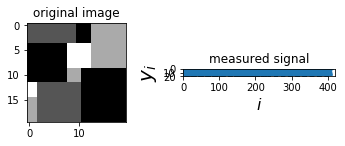

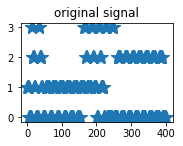

In [19]:
import robustsp as rsp
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import pkg_resources

'''
n =

   400


MSElasso =

   83.5977

rankflasso: starting iterations

MSE_rank1 =

  105.8938

rankflasso: starting iterations

MSE_rank2 =

   21.8556
'''

# Read image of sqares (20 x 20 pixels)
path = pkg_resources.resource_filename('robustsp', 'data/images.mat')
# contains the vectors y20 (clean data) and y20n (noisy data)
img = scipy.io.loadmat(path,struct_as_record=False)
y20 = img['y20']
y20n = img['y20n']
n = len(y20)
scaledata = lambda x: 3*(x-np.min(x)) / (np.max(x) - np.min(x))

# Plot the image
fig1 = plt.figure(0)
ax0 = fig1.add_subplot(2,2,1)
#plt.subplot(221)
fig1.add_subplot(2,2,1)
ax0.set_title('original image')
#plt.title('original image')
ax0.imshow(np.reshape(y20,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
              interpolation='none', cmap=plt.cm.gray)
#plt.imshow(np.reshape(y20,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),
#              interpolation='none', cmap=plt.cm.gray)
fig1.show()

# Plot the signal
fig2 = plt.figure(1)
#ax02 = plt.subplot(2,2,1) # ,aspect='equal'
plt.subplot(2,2,1)
#plt.axis('tight')
#plt.autoscale(axis='both')
#ax02.set_title('original signal')
plt.title('original signal')
#ax02.plot(range(1,n+1),y20,'*',markersize=14)
plt.plot(range(1,n+1),y20,'*',markersize=14)

# Plot the image + noise
plt.figure(0)
#ax2 = plt.subplot(2,2,2)

#ax2.set_title('image + noise')
#ax2.imshow(np.reshape(y20n,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),interpolation='none', cmap=plt.cm.gray)
fig1.add_subplot(2,2,2)
plt.imshow(np.reshape(y20n,(int(np.sqrt(n)),int(np.sqrt(n))),order="F"),interpolation='none', cmap=plt.cm.gray)
fig1.show()

# Plot the noisy (measured) signal
fig2
ax12 = plt.subplot(2,2,2) # ,aspect='equal'
ax12.set_title('measured signal')
ax12.set_xlabel(r"$i$",fontsize=16)
ax12.set_ylabel(r"$y_{i}$",fontsize=20)
ax12.plot(range(1,n+1),y20n,'*',markersize=14)


# Compute the Lasso solution
L = 20 # grid size
Blas20n, stats = rsp.enetpath(y20n,np.eye(n),1,L,1e-3,False)

Blas20n = Blas20n[:,1:] # get rid of all zeros
# Choose the best Lasso solution
ero = scaledata(Blas20n - y20)
MSElasso = np.min(np.sum(ero**2,axis=1))
indx = np.nanargmin(np.sum(ero**2,axis=0))

Blas20nMat = scipy.io.loadmat('Blas20n.mat',struct_as_record=False)['Blas20n']
np.array_equal(np.around(Blas20n,4),Blas20nMat) # False
np.isclose(np.around(Blas20n,4),Blas20nMat).all() # False
np.isclose(np.around(Blas20n,4),np.around(Blas20nMat,4)).all() # True
np.array_equal(np.around(Blas20n,4),np.around(Blas20nMat,4)) # True

In [ ]:
n = np.zeros((3,3))
y = np.ones(3)


In [ ]:
lam0 = np.max(np.abs(np.eye(n).T @ y20n))
lamgrid = 1e-3 ** (np.arange(L+1)/L)*lam0
rsp.enet(y20n, np.eye(n), np.zeros(21), lamgrid[0])

In [ ]:
X = np.array([(1,2,3),(4,5,6),(7,8,9)])
np.array([1,2,3]) + X[:,1].T @ np.array([6,7,8])

In [4]:
# Read image of sqares (20 x 20 pixels)
path = pkg_resources.resource_filename('robustsp', 'data/images.mat')
# contains the vectors y20 (clean data) and y20n (noisy data)
img = scipy.io.loadmat(path,struct_as_record=False)
y20 = img['y20']
y20n = img['y20n']
n = len(y20)
# Compute the Lasso solution
L = 20 # grid size
Blas20n, stats = rsp.enetpath(y20n,np.eye(n),1,L,1e-3,False)
Blas20n[:,-1]

array([ 1.15444902e+00,  8.35459355e-01,  9.53596658e-01,  1.00499670e+00,
        9.02064205e-02,  2.45434521e-02, -1.23986948e-02,  2.99668893e+00,
       -2.30837894e-01, -1.93926720e-02, -5.15012993e-02, -8.02150303e-02,
        3.17160325e+00,  3.11167167e+00,  3.29062722e+00,  2.01996891e+00,
        1.57290337e+00,  2.03564506e+00,  2.14577386e+00,  2.37199998e+00,
        8.71230792e-01,  1.08317907e+00,  1.00551903e+00,  2.99668893e+00,
        8.78621298e-02, -1.18630726e-01, -1.69006185e-02, -1.53700647e-01,
        3.40319606e-01, -5.60895851e-02,  0.00000000e+00,  1.09418010e-01,
        3.21077619e+00,  2.90527309e+00,  2.88746698e+00,  2.25963894e+00,
        1.80745895e+00,  2.27330493e+00,  2.08230275e+00,  2.16833816e+00,
        8.63756797e-01,  0.00000000e+00,  7.53904238e-01,  1.17103208e+00,
        2.16370032e-02, -7.23896964e-02, -4.78144808e-02,  1.84849719e-01,
       -4.89781328e-02, -2.49823037e-01, -1.35419654e-01, -2.92204768e-01,
        1.02353289e+00,  

In [ ]:
"""
ans
 0.0

 lam1 
 2.344054971563103
"""
import robustsp as rsp
rsp.SoftThresh(0,2.344054971563103)